<a href="https://colab.research.google.com/github/SankeerthShabad/IDS/blob/main/HW7/Problem1_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing the data dermatologyDF

In [1]:
# importing pandas and numpy

import pandas as pd
import numpy as np

# loading csv data set into dermatology

dermatologyDF = pd.read_csv("https://raw.githubusercontent.com/SankeerthShabad/IDS/main/HW7/dermatology.csv")

# printing dermatologyDF

dermatologyDF.head(5)

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,disappearance_of_the_granular_layer,vacuolisation_and_damage_of_basal_layer,spongiosis,saw-tooth_appearance_of_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_inflitrate,band-like_infiltrate,age,class
0,2,2,0,3,0,0,0,0,1,0,...,0,0,3,0,0,0,1,0,55.0,2
1,3,3,3,2,1,0,0,0,1,1,...,0,0,0,0,0,0,1,0,8.0,1
2,2,1,2,3,1,3,0,3,0,0,...,0,2,3,2,0,0,2,3,26.0,3
3,2,2,2,0,0,0,0,0,3,2,...,3,0,0,0,0,0,3,0,40.0,1
4,2,3,2,2,2,2,0,2,0,0,...,2,3,2,3,0,0,2,3,45.0,3


### After importing dermatologyDF we can see 5 rows and 35 columns.

# Check for any missing values

In [2]:
# Checking for missing values

dermatologyDF.isnull().sum()>0

erythema                                    False
scaling                                     False
definite_borders                            False
itching                                     False
koebner_phenomenon                          False
polygonal_papules                           False
follicular_papules                          False
oral_mucosal_involvement                    False
knee_and_elbow_involvement                  False
scalp_involvement                           False
family_history                              False
melanin_incontinence                        False
eosinophils_in_the_infiltrate               False
pnl_infiltrate                              False
fibrosis_of_the_papillary_dermis            False
exocytosis                                  False
acanthosis                                  False
hyperkeratosis                              False
parakeratosis                               False
clubbing_of_the_rete_ridges                 False


### We can see there are missing values in age column

# Imputing missing values

In [3]:
# Imputing missing values

dermatologyDF['age'].fillna(dermatologyDF['age'].mean(),inplace= True)

In [4]:
dermatologyDF.isnull().sum()>0

erythema                                    False
scaling                                     False
definite_borders                            False
itching                                     False
koebner_phenomenon                          False
polygonal_papules                           False
follicular_papules                          False
oral_mucosal_involvement                    False
knee_and_elbow_involvement                  False
scalp_involvement                           False
family_history                              False
melanin_incontinence                        False
eosinophils_in_the_infiltrate               False
pnl_infiltrate                              False
fibrosis_of_the_papillary_dermis            False
exocytosis                                  False
acanthosis                                  False
hyperkeratosis                              False
parakeratosis                               False
clubbing_of_the_rete_ridges                 False


# Plot the distribution of disease vs. age in order to understand the relationship between the two

In [5]:
# Changing variable class to disease

dermatologyDF.rename(columns={'class':'disease'},inplace= True)

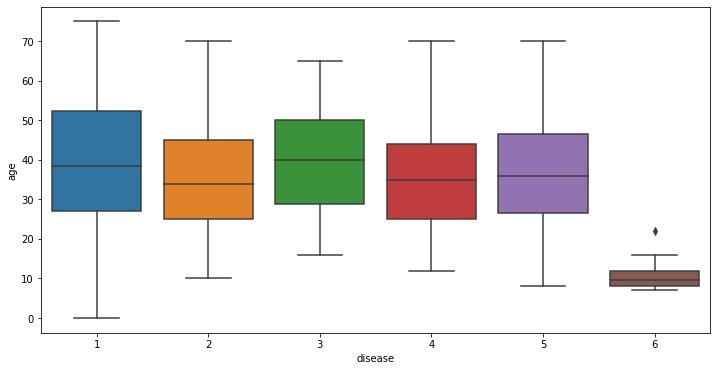

In [6]:
# Barplot for Age and Disease of dermatologyDF 

import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,6))
sns.boxplot(x='disease', y='age', data=dermatologyDF);

### We can observe from the barplot above that age is not a good predictor of illness. Disease is determined by a person's immunity, health, and lifestyle

# Use contingency tables to determine which ordinal attributes have the most leverage on disease. Plot the obtained results.

In [7]:
# Contingency tables

dropped_dermatology = dermatologyDF.drop(['age','disease'],axis=1)

for i in dropped_dermatology:
    display(dermatologyDF.groupby(['disease',(i)])[(i)].agg('count').unstack().fillna(0))
    print(end="          ")

erythema,0,1,2,3
disease,,,,
1,1.0,7.0,63.0,41.0
2,0.0,5.0,34.0,22.0
3,1.0,7.0,49.0,15.0
4,0.0,11.0,32.0,6.0
5,2.0,25.0,22.0,3.0
6,0.0,2.0,15.0,3.0


scaling,0,1,2,3
disease,,,,
1,0.0,13.0,64.0,35.0
2,0.0,7.0,43.0,11.0
3,2.0,28.0,37.0,5.0
4,0.0,24.0,25.0,0.0
5,6.0,34.0,11.0,1.0
6,0.0,5.0,15.0,0.0


definite_borders,0,1,2,3
disease,,,,
1,0.0,14.0,73.0,25.0
2,21.0,22.0,18.0,0.0
3,1.0,10.0,42.0,19.0
4,9.0,22.0,18.0,0.0
5,23.0,16.0,11.0,2.0
6,5.0,9.0,6.0,0.0


itching,0,1,2,3
disease,,,,
1,55.0,22.0,21.0,14.0
2,9.0,16.0,25.0,11.0
3,2.0,9.0,28.0,33.0
4,33.0,10.0,5.0,1.0
5,8.0,7.0,20.0,17.0
6,11.0,8.0,1.0,0.0


koebner_phenomenon,0,1,2,3
disease,,,,
1,63.0,27.0,18.0,4.0
2,60.0,0.0,1.0,0.0
3,20.0,18.0,23.0,11.0
4,9.0,25.0,12.0,3.0
5,52.0,0.0,0.0,0.0
6,20.0,0.0,0.0,0.0


polygonal_papules,0,1,2,3
disease,,,,
1,112.0,0.0,0.0,0.0
2,61.0,0.0,0.0,0.0
3,3.0,1.0,41.0,27.0
4,49.0,0.0,0.0,0.0
5,52.0,0.0,0.0,0.0
6,20.0,0.0,0.0,0.0


follicular_papules,0,1,2,3
disease,,,,
1,109.0,2.0,1.0,0.0
2,60.0,1.0,0.0,0.0
3,72.0,0.0,0.0,0.0
4,49.0,0.0,0.0,0.0
5,43.0,6.0,3.0,0.0
6,0.0,2.0,12.0,6.0


oral_mucosal_involvement,0,1,2,3
disease,,,,
1,112.0,0.0,0.0,0.0
2,61.0,0.0,0.0,0.0
3,5.0,9.0,45.0,13.0
4,49.0,0.0,0.0,0.0
5,52.0,0.0,0.0,0.0
6,20.0,0.0,0.0,0.0


knee_and_elbow_involvement,0,1,2,3
disease,,,,
1,23.0,15.0,54.0,20.0
2,57.0,4.0,0.0,0.0
3,71.0,0.0,1.0,0.0
4,49.0,0.0,0.0,0.0
5,50.0,2.0,0.0,0.0
6,1.0,7.0,9.0,3.0


scalp_involvement,0,1,2,3
disease,,,,
1,23.0,23.0,50.0,16.0
2,56.0,3.0,2.0,0.0
3,70.0,2.0,0.0,0.0
4,49.0,0.0,0.0,0.0
5,52.0,0.0,0.0,0.0
6,14.0,2.0,4.0,0.0


family_history,0,1
disease,,
1,80.0,32.0
2,58.0,3.0
3,71.0,1.0
4,49.0,0.0
5,52.0,0.0
6,10.0,10.0


melanin_incontinence,0,1,2,3
disease,,,,
1,112.0,0.0,0.0,0.0
2,61.0,0.0,0.0,0.0
3,2.0,8.0,46.0,16.0
4,49.0,0.0,0.0,0.0
5,52.0,0.0,0.0,0.0
6,20.0,0.0,0.0,0.0


eosinophils_in_the_infiltrate,0,1,2
disease,,,
1,109.0,2.0,1.0
2,39.0,16.0,6.0
3,62.0,8.0,2.0
4,46.0,3.0,0.0
5,48.0,4.0,0.0
6,20.0,0.0,0.0


pnl_infiltrate,0,1,2,3
disease,,,,
1,34.0,37.0,35.0,6.0
2,17.0,23.0,20.0,1.0
3,72.0,0.0,0.0,0.0
4,43.0,6.0,0.0,0.0
5,52.0,0.0,0.0,0.0
6,17.0,3.0,0.0,0.0


fibrosis_of_the_papillary_dermis,0,1,2,3
disease,,,,
1,112.0,0.0,0.0,0.0
2,61.0,0.0,0.0,0.0
3,70.0,0.0,2.0,0.0
4,49.0,0.0,0.0,0.0
5,0.0,8.0,21.0,23.0
6,20.0,0.0,0.0,0.0


exocytosis,0,1,2,3
disease,,,,
1,93.0,8.0,11.0,0.0
2,1.0,7.0,32.0,21.0
3,1.0,6.0,38.0,27.0
4,1.0,8.0,28.0,12.0
5,20.0,20.0,12.0,0.0
6,2.0,8.0,8.0,2.0


acanthosis,0,1,2,3
disease,,,,
1,1.0,14.0,70.0,27.0
2,4.0,14.0,35.0,8.0
3,1.0,9.0,43.0,19.0
4,4.0,19.0,26.0,0.0
5,0.0,7.0,25.0,20.0
6,0.0,8.0,11.0,1.0


hyperkeratosis,0,1,2,3
disease,,,,
1,53.0,30.0,25.0,4.0
2,50.0,10.0,0.0,1.0
3,54.0,15.0,3.0,0.0
4,37.0,9.0,3.0,0.0
5,27.0,14.0,11.0,0.0
6,6.0,12.0,2.0,0.0


parakeratosis,0,1,2,3
disease,,,,
1,1.0,20.0,69.0,22.0
2,24.0,17.0,17.0,3.0
3,15.0,32.0,20.0,5.0
4,17.0,27.0,5.0,0.0
5,27.0,11.0,14.0,0.0
6,2.0,11.0,7.0,0.0


clubbing_of_the_rete_ridges,0,1,2,3
disease,,,,
1,3.0,15.0,60.0,34.0
2,61.0,0.0,0.0,0.0
3,72.0,0.0,0.0,0.0
4,49.0,0.0,0.0,0.0
5,49.0,2.0,1.0,0.0
6,18.0,2.0,0.0,0.0


elongation_of_the_rete_ridges,0,1,2,3
disease,,,,
1,0.0,11.0,61.0,40.0
2,54.0,4.0,3.0,0.0
3,72.0,0.0,0.0,0.0
4,49.0,0.0,0.0,0.0
5,5.0,6.0,31.0,10.0
6,18.0,2.0,0.0,0.0


thinning_of_the_suprapapillary_epidermis,0,1,2,3
disease,,,,
1,4.0,17.0,60.0,31.0
2,60.0,1.0,0.0,0.0
3,72.0,0.0,0.0,0.0
4,49.0,0.0,0.0,0.0
5,51.0,1.0,0.0,0.0
6,20.0,0.0,0.0,0.0


spongiform_pustule,0,1,2,3
disease,,,,
1,52.0,30.0,24.0,6.0
2,53.0,6.0,2.0,0.0
3,72.0,0.0,0.0,0.0
4,49.0,0.0,0.0,0.0
5,51.0,1.0,0.0,0.0
6,19.0,1.0,0.0,0.0


munro_microabcess,0,1,2,3
disease,,,,
1,34.0,36.0,33.0,9.0
2,61.0,0.0,0.0,0.0
3,71.0,0.0,0.0,1.0
4,48.0,1.0,0.0,0.0
5,52.0,0.0,0.0,0.0
6,20.0,0.0,0.0,0.0


focal_hypergranulosis,0,1,2,3
disease,,,,
1,112.0,0.0,0.0,0.0
2,61.0,0.0,0.0,0.0
3,2.0,12.0,43.0,15.0
4,49.0,0.0,0.0,0.0
5,52.0,0.0,0.0,0.0
6,19.0,1.0,0.0,0.0


disappearance_of_the_granular_layer,0,1,2,3
disease,,,,
1,46.0,12.0,40.0,14.0
2,61.0,0.0,0.0,0.0
3,63.0,1.0,8.0,0.0
4,31.0,17.0,1.0,0.0
5,52.0,0.0,0.0,0.0
6,20.0,0.0,0.0,0.0


vacuolisation_and_damage_of_basal_layer,0,1,2,3
disease,,,,
1,111.0,1.0,0.0,0.0
2,61.0,0.0,0.0,0.0
3,1.0,2.0,43.0,26.0
4,49.0,0.0,0.0,0.0
5,52.0,0.0,0.0,0.0
6,20.0,0.0,0.0,0.0


spongiosis,0,1,2,3
disease,,,,
1,112.0,0.0,0.0,0.0
2,4.0,2.0,35.0,20.0
3,35.0,6.0,20.0,11.0
4,2.0,7.0,31.0,9.0
5,40.0,7.0,4.0,1.0
6,6.0,6.0,6.0,2.0


saw-tooth_appearance_of_retes,0,1,2,3
disease,,,,
1,112.0,0.0,0.0,0.0
2,61.0,0.0,0.0,0.0
3,1.0,4.0,40.0,27.0
4,48.0,1.0,0.0,0.0
5,52.0,0.0,0.0,0.0
6,20.0,0.0,0.0,0.0


follicular_horn_plug,0,1,2,3
disease,,,,
1,112.0,0.0,0.0,0.0
2,60.0,1.0,0.0,0.0
3,71.0,1.0,0.0,0.0
4,49.0,0.0,0.0,0.0
5,51.0,1.0,0.0,0.0
6,1.0,7.0,8.0,4.0


perifollicular_parakeratosis,0,1,2,3
disease,,,,
1,112.0,0.0,0.0,0.0
2,60.0,1.0,0.0,0.0
3,72.0,0.0,0.0,0.0
4,49.0,0.0,0.0,0.0
5,52.0,0.0,0.0,0.0
6,0.0,3.0,13.0,4.0


inflammatory_monoluclear_inflitrate,0,1,2,3
disease,,,,
1,5,22,68,17
2,4,23,27,7
3,1,3,45,23
4,1,13,31,4
5,1,17,24,10
6,1,7,11,1


band-like_infiltrate,0,1,2,3
disease,,,,
1,110.0,1.0,1.0,0.0
2,60.0,0.0,1.0,0.0
3,0.0,0.0,20.0,52.0
4,49.0,0.0,0.0,0.0
5,51.0,1.0,0.0,0.0
6,19.0,1.0,0.0,0.0


/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:345: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


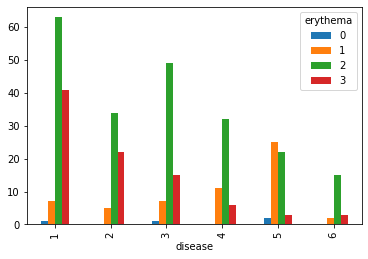

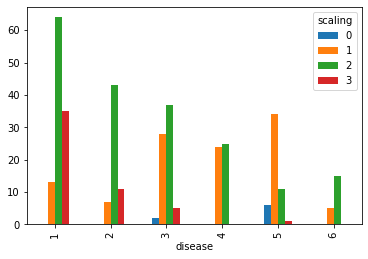

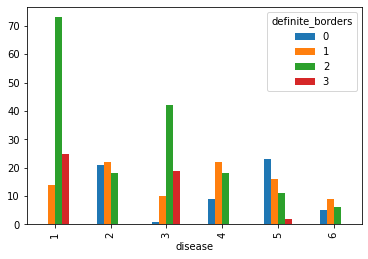

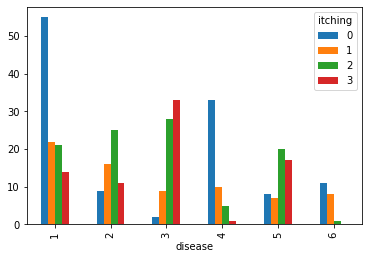

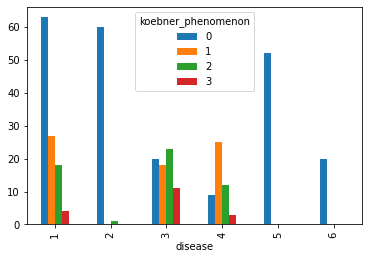

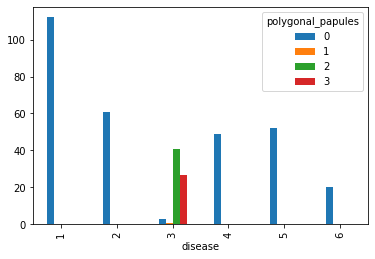

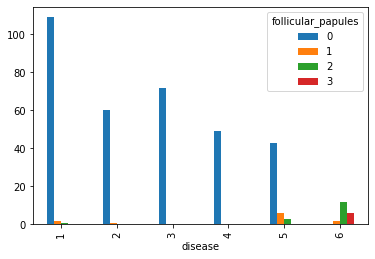

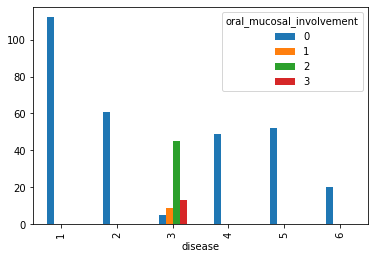

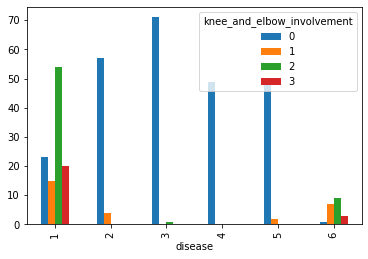

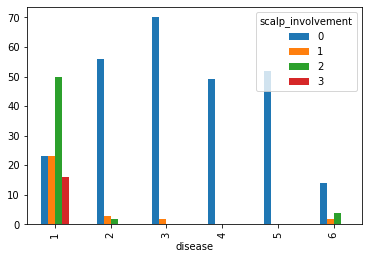

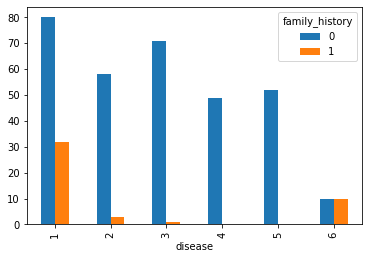

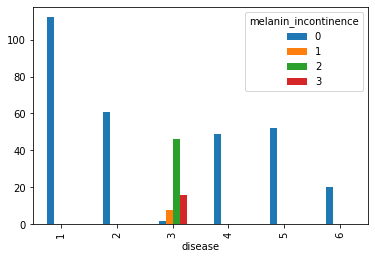

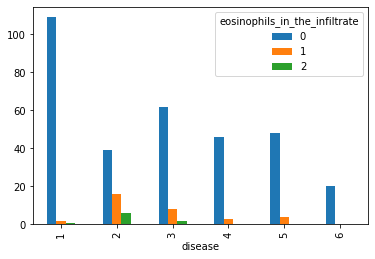

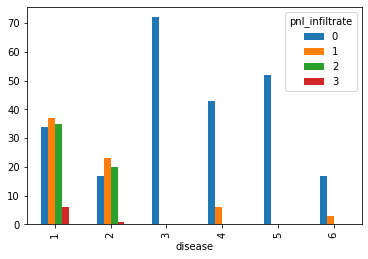

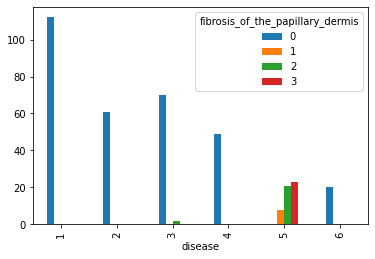

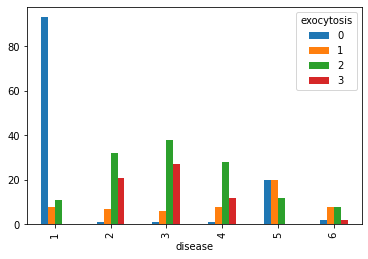

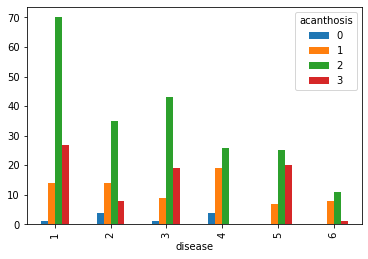

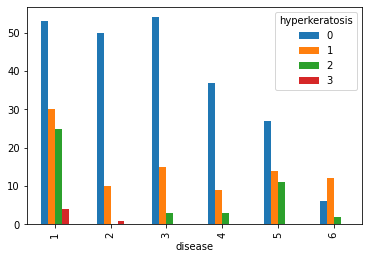

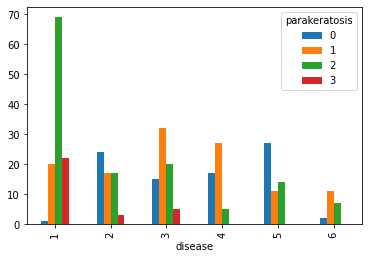

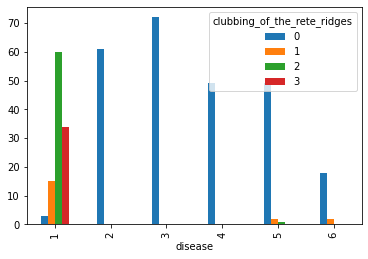

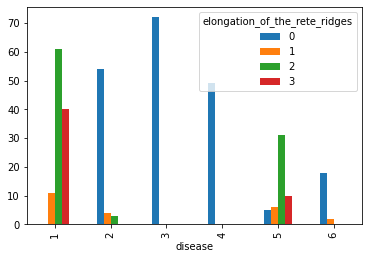

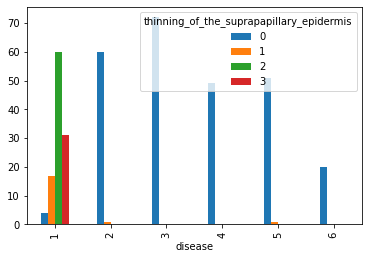

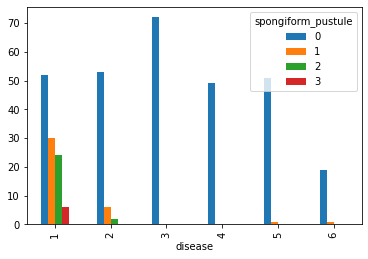

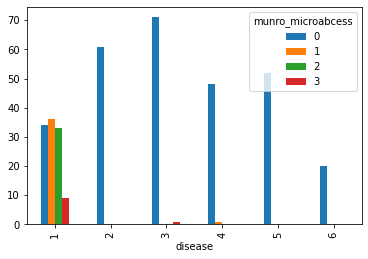

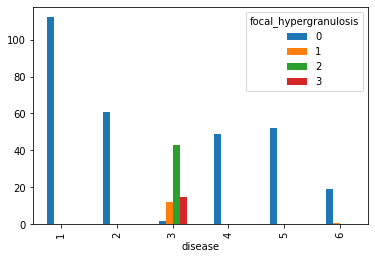

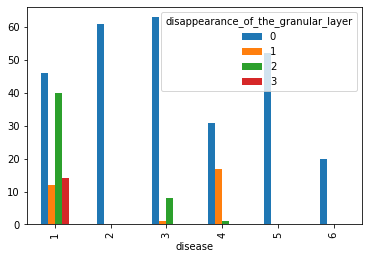

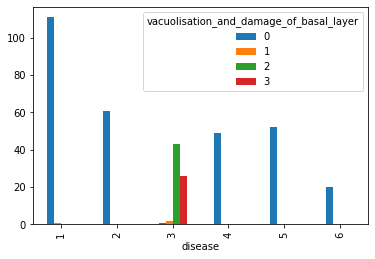

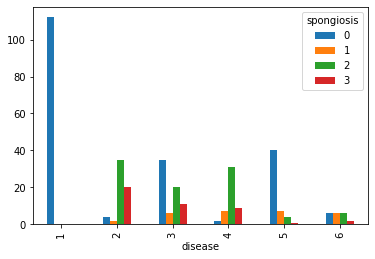

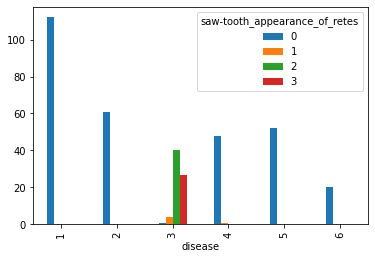

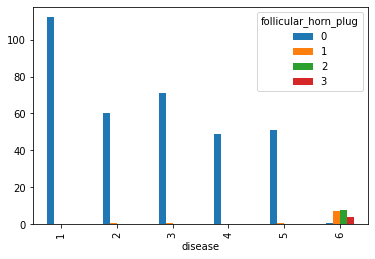

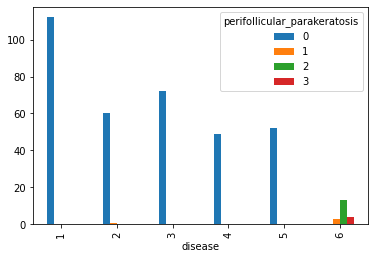

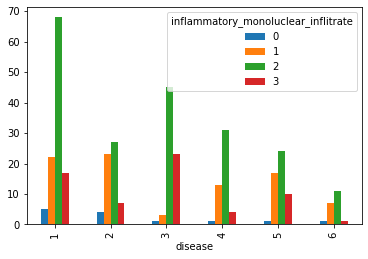

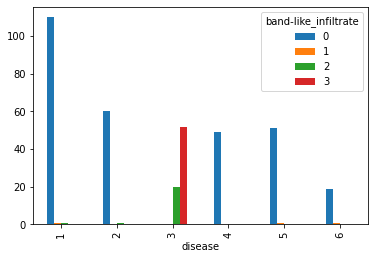

In [8]:
# Ploting contingency tables

for i in dropped_dermatology:
    disease_plot = dermatologyDF.groupby(['disease',i])[i].agg('count').unstack().fillna(0).plot(kind='bar')

In [9]:
dermatologyCorr = dermatologyDF.corr(method='pearson')
dermatology_corr_impact_action_yn = dermatologyDF[dermatologyDF.columns[0:35]].corr()['disease'][:-1]
top_dermatology = dermatology_corr_impact_action_yn[((dermatology_corr_impact_action_yn >= .5) | (dermatology_corr_impact_action_yn <= -.5)) & (dermatology_corr_impact_action_yn !=1.000)]
top_dermatology

scalp_involvement                          -0.533208
pnl_infiltrate                             -0.550195
fibrosis_of_the_papillary_dermis            0.526976
clubbing_of_the_rete_ridges                -0.668781
thinning_of_the_suprapapillary_epidermis   -0.684864
munro_microabcess                          -0.520995
Name: disease, dtype: float64

### scalp_involvement, pnl_infiltrate, fibrosis_of_the_papillary_dermis, clubbing_of_the_rete_ridges, and thinning_of_the_suprapapillary_epidermis have more leverage on illness, as shown by the above contingency tables and plotting.

# Create a new column disease_1 by extracting only those records where the Disease=1 (psoriasis) , assigning “1” for those rows in the newly created  column, and marking “0” for the rest. 

In [10]:
# Creating new column disease_1

dermatologyDF['disease_1'] = [0 if i!=1 else 1 for i in dermatologyDF['disease']]

In [11]:
#printing dermatologyDF

dermatologyDF.head(5)

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,vacuolisation_and_damage_of_basal_layer,spongiosis,saw-tooth_appearance_of_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_inflitrate,band-like_infiltrate,age,disease,disease_1
0,2,2,0,3,0,0,0,0,1,0,...,0,3,0,0,0,1,0,55.0,2,0
1,3,3,3,2,1,0,0,0,1,1,...,0,0,0,0,0,1,0,8.0,1,1
2,2,1,2,3,1,3,0,3,0,0,...,2,3,2,0,0,2,3,26.0,3,0
3,2,2,2,0,0,0,0,0,3,2,...,0,0,0,0,0,3,0,40.0,1,1
4,2,3,2,2,2,2,0,2,0,0,...,3,2,3,0,0,2,3,45.0,3,0


### diesease_1 have been added in the dermatologyDF.

# Create four models and evaluate each using 3-fold cross-validation:

In [12]:
#Spliting dermatology data into test and training

from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import svm

X = dermatologyDF['age'].values.reshape(-1,1)
y = dermatologyDF['disease_1']

x_train, x_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, 
                                                          test_size = 0.3, 
                                                          random_state = 100)
X.shape, y.shape

((366, 1), (366,))

# A linear regression model for disease_1 vs. age

In [13]:
# create the model
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error


lm = linear_model.LinearRegression()

# fit a new model on the reduced training data
lm.fit(x_train, y_train)

print("Intercept :", lm.intercept_)
print('Slope :', lm.coef_)

Intercept : 0.15230778353839855
Slope : [0.00462391]


In [14]:
# printing R2 score and MSE

y_test_pred = lm.predict(x_test)

print('R2 score:',            r2_score(y_test, y_test_pred))
print('Mean squared error:', mean_squared_error(y_test, y_test_pred))

R2 score: -0.005676265578715922
Mean squared error: 0.1994729782966047


### Although the R2 score and MSE are at their lowest, we have created a model that includes both categorical variables.

# Scatter plot for age and disease_1

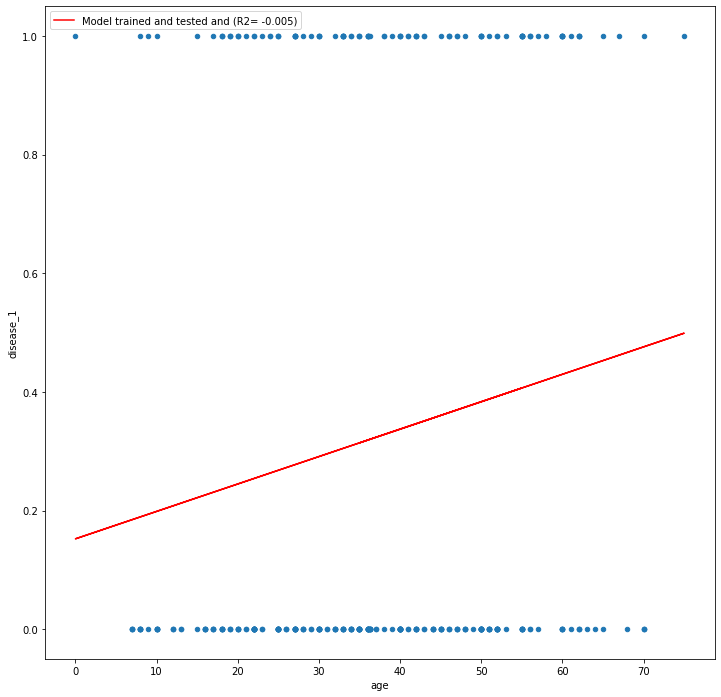

In [15]:
# Ploting scatter plot

dermatologyDF.plot(kind='scatter', x='age', y='disease_1', figsize=(12, 12))

plt.plot(X, lm.intercept_ + lm.coef_*X, "r", label="Model trained and tested and (R2= -0.005)")

plt.legend(loc="upper left")
plt.show()

### We can see that the line of best fit is not intersecting with data sets, and that the MSE and R2 score are at their poorest, indicating that age vs disease 1 is not a perfect match.

# 3-fold cross-validation of Linear model

In [16]:
# 3 flod cross validation for linear model

from sklearn.model_selection import cross_val_score
cross_validation = cross_val_score(lm, X, y, cv=3)
print("3 fold cross-validation:",cross_validation.mean())

3 fold cross-validation: -0.01036201994585928


# NB classifier model for disease_1 vs. the top ranking (relevant) 5 attributes

In [17]:
# Spliting data for test and training

X1 = dermatologyDF[['scalp_involvement', 'pnl_infiltrate','fibrosis_of_the_papillary_dermis', 'clubbing_of_the_rete_ridges','thinning_of_the_suprapapillary_epidermis']]
y1 = dermatologyDF['disease_1']

x_train, x_test, y_train, y_test = train_test_split(X1, y1, train_size = 0.7, 
                                                          test_size = 0.3, 
                                                          random_state = 100)
X1.shape, y1.shape

((366, 5), (366,))

In [18]:
# GaussianNB and BernoulliNB models


from sklearn.naive_bayes import GaussianNB, BernoulliNB

nb = BernoulliNB()
nb.fit(X1,y1)

BernoulliNB()

# Confusion matrix

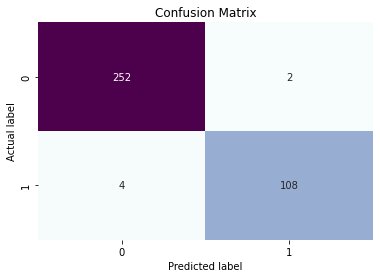

In [19]:
# Confusion matrix of NB

import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score

y_pred_nb = nb.predict(X1)
cm_nb = confusion_matrix(y1,y_pred_nb)
sns.heatmap(cm_nb, annot=True, cbar=False, fmt='0.4g', cmap='BuPu');
plt.title('Confusion Matrix');
plt.xlabel('Predicted label');
plt.ylabel('Actual label');
plt.show()

# Overall Accuracy

In [20]:
# Printing Accuracy score

print("Accuracy Score:",accuracy_score(y1, y_pred_nb))

Accuracy Score: 0.9836065573770492


# 3-fold cross-validation of NB classifier

In [21]:
# 3 cross validation using cross_val_score

cross_validation_NB = cross_val_score(nb, X1, y1, cv=3)
print("3 fold cross validation: ",cross_validation_NB.mean())

3 fold cross validation:  0.9754098360655737


### NB classifier model for disease_1 vs. the top ranking 5 attributes have a accuracy score of 98% which is the best fit.

#decision tree model (Gini or Entropy) 

In [22]:
# Spliting data into test and training

X2 = dermatologyDF.drop(['disease','disease_1'],axis=1)
y2 = dermatologyDF['disease']

x_train, x_test, y_train, y_test = train_test_split(X2, y2, train_size = 0.7, 
                                                          test_size = 0.3, 
                                                          random_state = 100)
X2.shape, y2.shape

((366, 34), (366,))

In [23]:
# DecisionTreeClassifier using Gini

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

CART_model = DecisionTreeClassifier(criterion='gini')
CART_model.fit(X2,y2)


DecisionTreeClassifier()

# Plotting decision tree using Gini

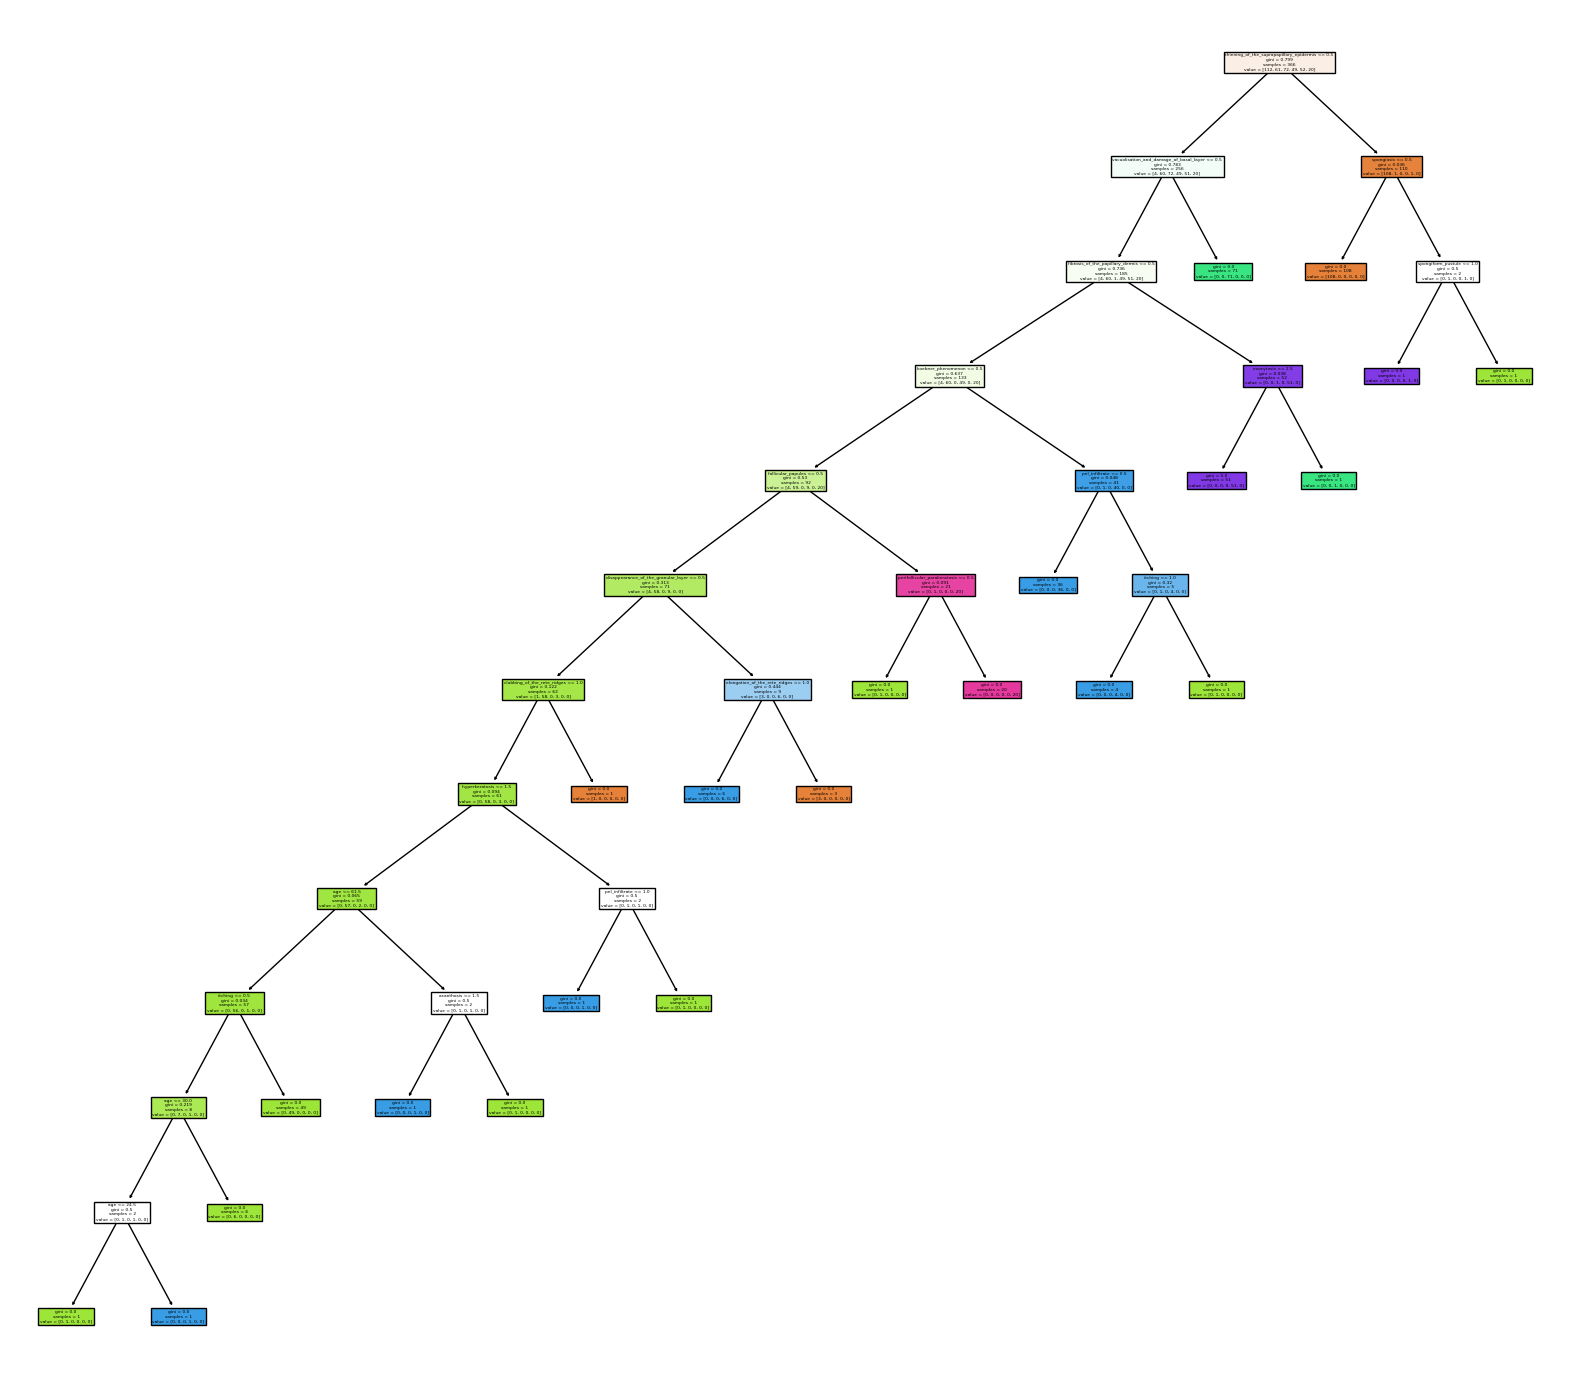

In [24]:
# Ploting decision tree using Gini model 

plt.figure(figsize=(20,18), dpi=100)
tree.plot_tree(CART_model, feature_names=X2.keys(), filled=True);

# Confusion matrix for Gini

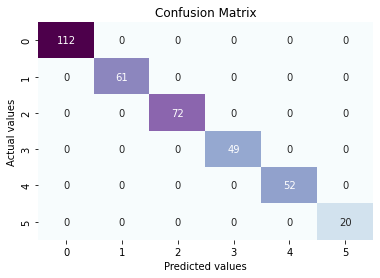

In [25]:
# Confusion matrix for Gini

y_pred_CART = CART_model.predict(X2)
cm_CART = confusion_matrix(y2,y_pred_CART)
sns.heatmap(cm_CART, annot=True, cbar=False, fmt='0.4g', cmap='BuPu');
plt.title('Confusion Matrix');
plt.xlabel('Predicted values');
plt.ylabel('Actual values');
plt.show()

# Accuracy score for Gini

In [26]:
# Accuracy score for gini

print("Accuracy Score:",accuracy_score(y2, y_pred_CART))

Accuracy Score: 1.0


### Gini's accuracy score is 100 percent, indicating that it is the best model.

# Plotting decision tree using Entropy

In [27]:
# DecisionTreeClassifier for Entropy

C5_model = DecisionTreeClassifier(criterion='entropy')
C5_model.fit(X2,y2)

DecisionTreeClassifier(criterion='entropy')

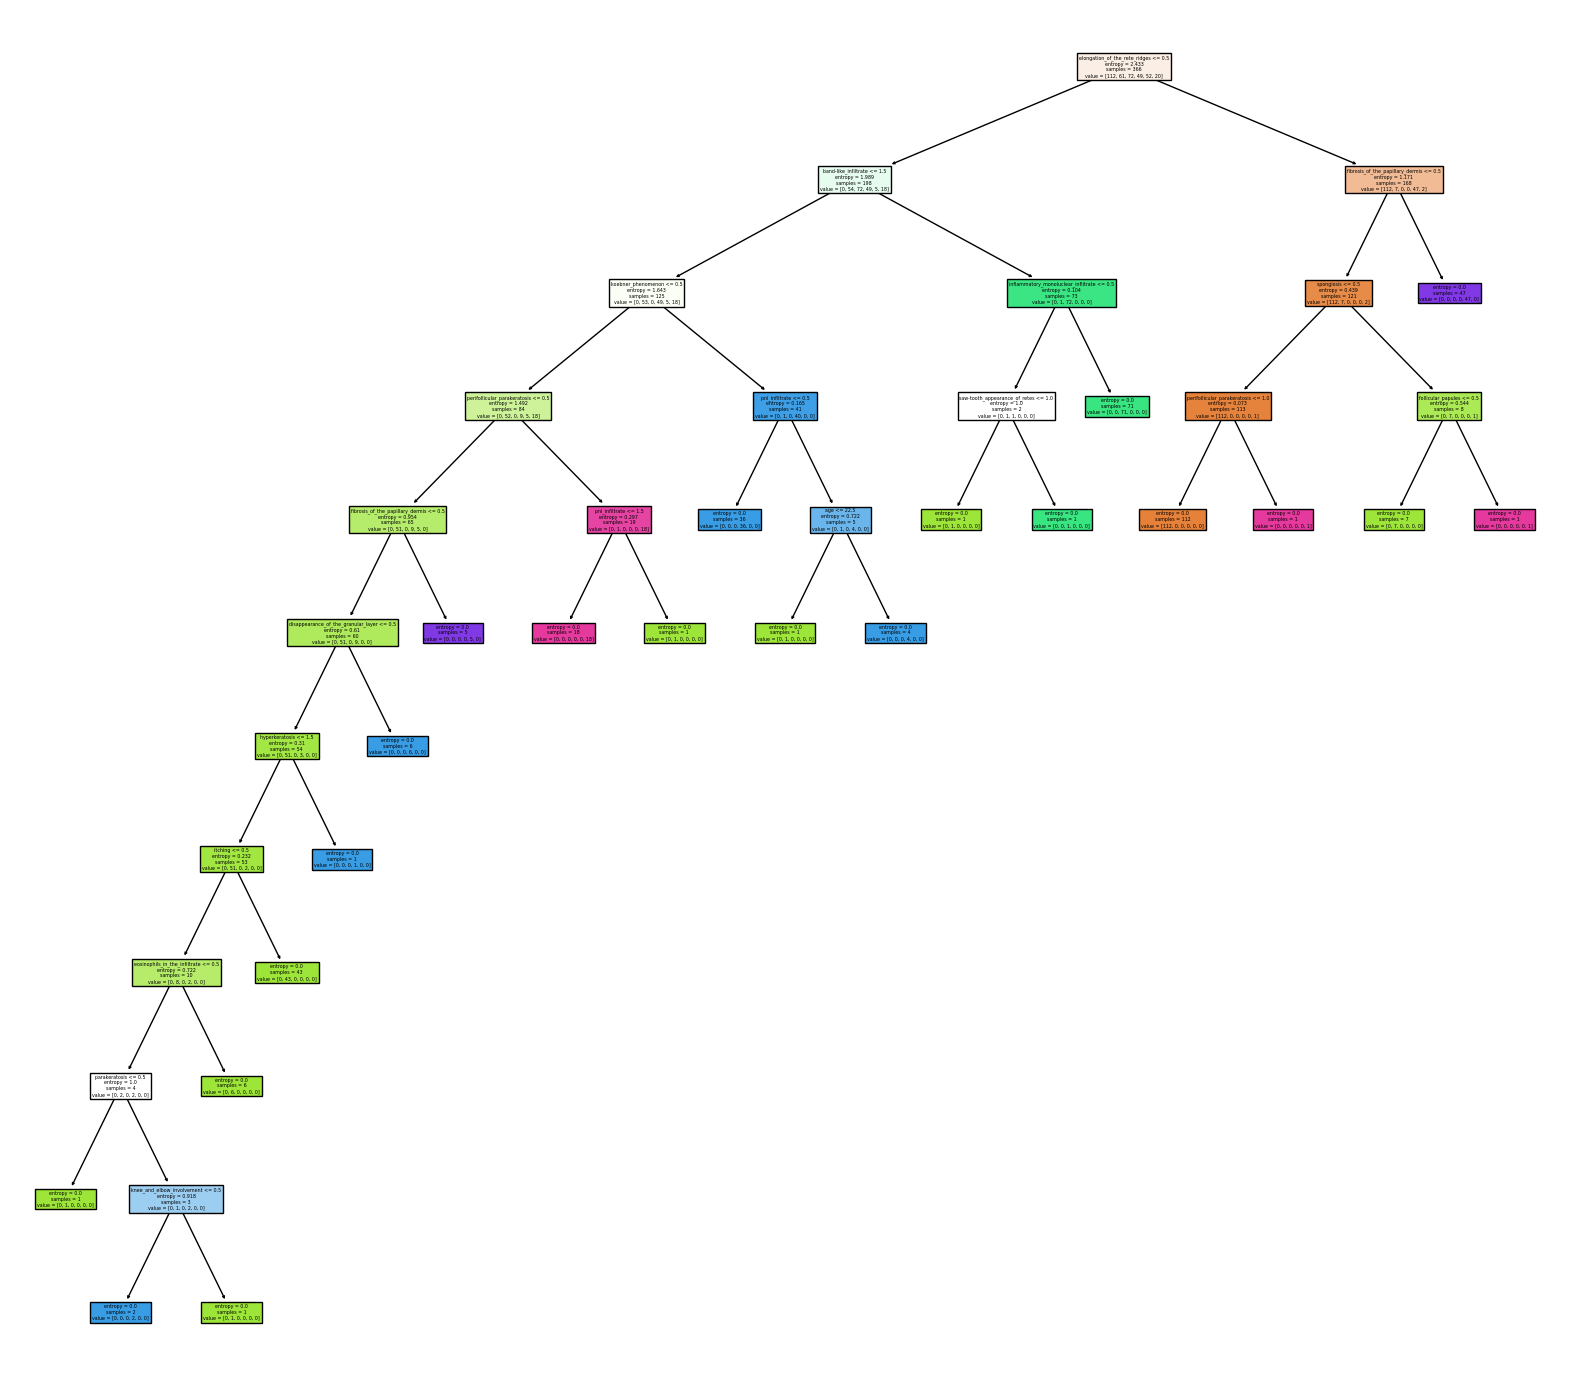

In [28]:
# Ploting DecisionTreeClassifier for Entropy

plt.figure(figsize=(20,18), dpi=100)
tree.plot_tree(C5_model, feature_names=X2.keys(), filled=True);

# Confusion matrix for Entropy

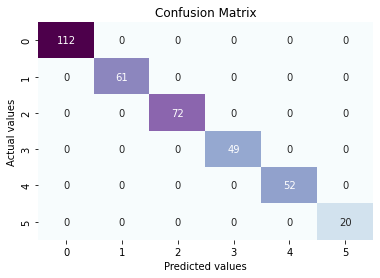

In [29]:
# Confusion matrix for Entropy

y_pred_C5 = C5_model.predict(X2)
cm_C5 = confusion_matrix(y2,y_pred_C5)
sns.heatmap(cm_C5, annot=True, cbar=False, fmt='0.4g', cmap='BuPu');
plt.title('Confusion Matrix');
plt.xlabel('Predicted values');
plt.ylabel('Actual values');
plt.show()

# Accuracy score for Entropy

In [30]:
# Accuracy score for entropy

print("Accuracy Score:",accuracy_score(y2, y_pred_C5))

Accuracy Score: 1.0


### Even Entropy having accuracy of 100%.

# 3-fold cross-validation of Decision tree for Gini

In [31]:
# 3 fold cross validtaion for Gini

cross_validation_CART = cross_val_score(CART_model, X2, y2, cv=3)
print("3 fold cross validation:",cross_validation_CART.mean())

3 fold cross validation: 0.9153005464480873


# 3-fold cross-validation of Decision tree for Entropy

In [32]:
# 3 fold cross validtaion for Entropy

cross_validation_C5 = cross_val_score(C5_model, X2, y2, cv=3)
print("3 fold cross validation:",cross_validation_C5.mean())

3 fold cross validation: 0.9289617486338798


### We can observe from 3 fold cross validation of Gini and Entropy that Entropy is the best fit model when compared to Gini. After cross validation, Entropy has a 92 percent, whereas Gini has a 91 percent.

# Random forest model for the entire feature space vs. the disease column

In [33]:
# Spliting data into test and training

X3 = dermatologyDF.drop(['disease','disease_1'],axis=1)
y3 = dermatologyDF['disease']

x_train, x_test, y_train, y_test = train_test_split(X3, y3, train_size = 0.7, 
                                                          test_size = 0.3, 
                                                          random_state = 100)
X3.shape, y3.shape

((366, 34), (366,))

In [34]:
# Random forest using RandomForestClassifier()

from sklearn.ensemble import RandomForestClassifier

Random_forest = RandomForestClassifier()
Random_forest.fit(X3,y3)

RandomForestClassifier()

# Plotting Random forest

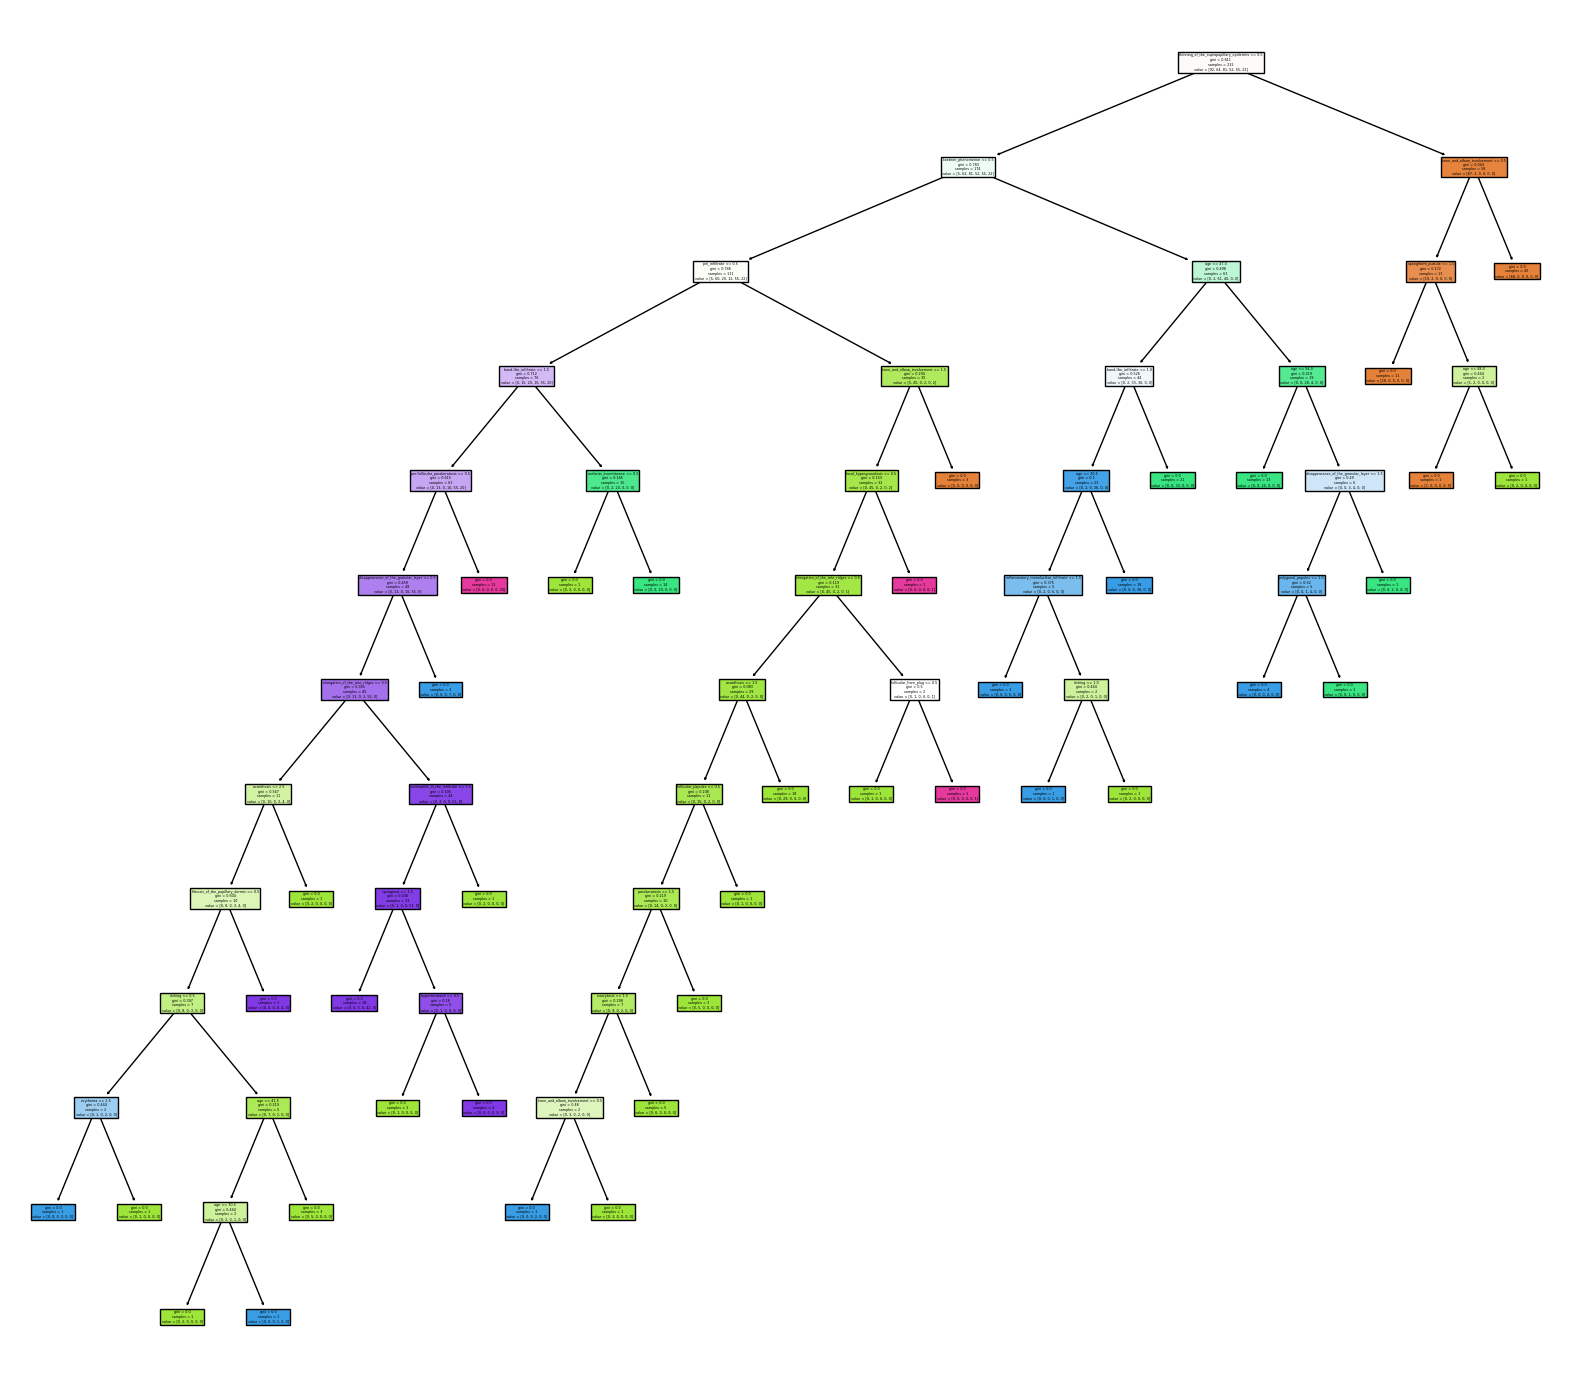

In [35]:
# ploting RandomForestClassifier

plt.figure(figsize=(20,18), dpi=100)
tree.plot_tree(Random_forest.estimators_[0], feature_names=X3.keys(), filled=True);

# Confusion matrix for Random forest

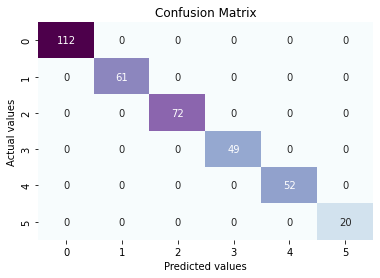

In [36]:
# Confusion matrix for RandomForestClassifier

y_pred_Random_forest = Random_forest.predict(X3)
cm_Random_forest = confusion_matrix(y3,y_pred_Random_forest)
sns.heatmap(cm_Random_forest, annot=True, cbar=False, fmt='0.4g', cmap='BuPu');
plt.title('Confusion Matrix');
plt.xlabel('Predicted values');
plt.ylabel('Actual values');
plt.show()

# Accuracy score for Random forest

In [37]:
# Accuracy score of RandomForestClassifier

print("Accuracy Score: ",accuracy_score(y3,y_pred_Random_forest))

Accuracy Score:  1.0


### The accuracy score of random forest is 100% 

# 3-fold cross-validation of Random forest

In [38]:
# 3 fold cross validtaion for RandomForestClassifier

cross_validation_Random_forest = cross_val_score(Random_forest, X3, y3, cv=3)
print("3 fold cross validation:",cross_validation_Random_forest.mean())

3 fold cross validation: 0.9726775956284152


### After 3 fold cross validtaion the random forest having 96% which is highest among all the models.

# Feature Importances using Random forest

In [39]:
# finding features using RandomForestClassifier

features=X3.keys()
importances = Random_forest.feature_importances_
indices = np.argsort(importances)

Text(0.5, 0, 'Importance')

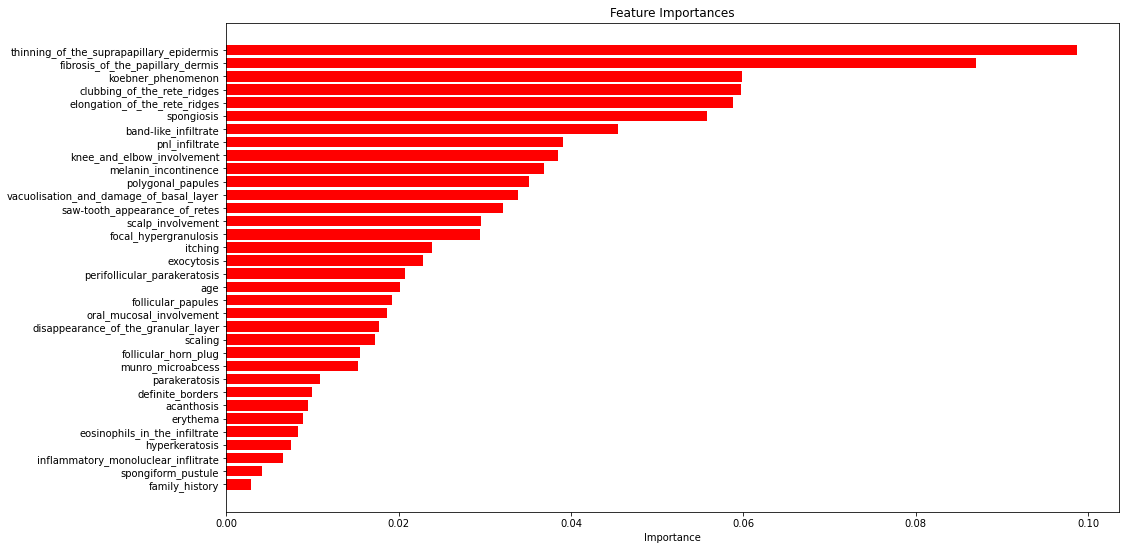

In [40]:
# Ploting features using RandomForestClassifier

plt.figure(figsize=(16,9))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='red')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Importance')

### We can observe from the preceding graph of attribute importance that there is a drop in attributes after dividing the variable at the tree node.

# **Summary: **

*   scalp_involvement, pnl_infiltrate, fibrosis_of_the_papillary_dermis, clubbing_of_the_rete_ridges, and thinning_of_the_suprapapillary_epidermis have more leverage on illness, as shown by the contingency tables and plotting.

*   Linear regrssion model have low R2 score and high MSE value

*   NB classifier model for disease_1 vs. the top ranking 5 attributes have a accuracy score of 98%.

*   Decision tree using Gini and Entropy having Accuracy score of 100% and have 3 fold cross validation of 90% by Gini and 92% by entropy

*   Random forest have the accuracy score of random forest is 100% and cross validation of 97%.

*   After evaluating the accuracy and cross validation scores of three models, we can conclude that the random forest model is a better match than the other models..




